In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [9]:
trips_data = pd.read_excel('trips_data.xlsx', index_col = 0)
trips_data.describe()

,salary,age,family_members
count,1000.000000,1000.000000,1000.000000
mean,111935.000000,55.209000,1.295000
std,54580.049073,11.925164,0.885867
min,0.000000,18.000000,0.000000
25%,68000.000000,50.000000,1.000000
50%,99000.000000,58.000000,1.000000
75%,161000.000000,63.000000,2.000000
max,250000.000000,82.000000,4.000000


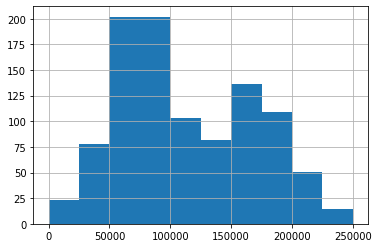

In [15]:
trips_data.salary.hist()

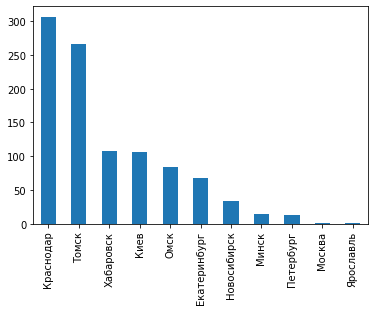

In [16]:
 trips_data.city.value_counts().plot(kind='bar')

In [76]:
trips = pd.get_dummies(trips_data, columns=['city', 'vacation_preference', 
                                    'transport_preference'])

In [24]:
trips

,salary,age,family_members,target,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,196000,25,1,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,London,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,83000,49,2,Sydney,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,Sydney,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,209000,55,2,Tokio,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
6,59000,53,1,London,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
7,73000,55,2,New York,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,216000,75,1,Sydney,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,56000,60,2,New York,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [77]:
trips_data.target.value_counts()

Paris       203
New York    201
Tokio       199
London      199
Sydney      198
Name: target, dtype: int64

In [78]:
model = RandomForestClassifier() # настройки в скобочках

In [79]:
x = trips.drop('target', axis=1) #все колонки кроме target, данные для прогноза
y = trips.target # выходные данные, что пытаемся предсказать

In [80]:
model.fit(x, y)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
{col:[0] for col in x.columns}

{'salary': [0],
 'age': [0],
 'family_members': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0]}

In [81]:
example = {
    'salary': [130001],
 'age': [57],
 'family_members': [1],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [1],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [1],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [1]
}
example_table = pd.DataFrame(example)

In [47]:
example_table

,salary,age,family_members,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,130001,57,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [82]:
model.predict(example_table)

array(['Sydney'], dtype=object)

In [83]:
model.predict_proba(example_table)

array([[0. , 0.1, 0. , 0.6, 0.3]])

In [70]:
model.classes_

array(['London', 'New York', 'Paris', 'Sydney', 'Tokio'], dtype=object)

In [86]:
model.feature_importances_

array([2.40645409e-01, 2.23836842e-01, 1.40904281e-01, 1.42135115e-02,
       1.29301683e-02, 2.14254314e-02, 4.61074786e-03, 1.78132707e-04,
       7.38943170e-03, 1.30590372e-02, 3.43251253e-03, 1.86117126e-02,
       9.50675997e-03, 2.57402294e-04, 3.96827955e-02, 0.00000000e+00,
       3.26139820e-02, 6.25744660e-02, 3.96169516e-02, 4.09506049e-05,
       2.06063056e-02, 2.65624786e-02, 6.73006905e-02])

In [85]:
x.columns

Index(['salary', 'age', 'family_members', 'city_Екатеринбург', 'city_Киев',
       'city_Краснодар', 'city_Минск', 'city_Москва', 'city_Новосибирск',
       'city_Омск', 'city_Петербург', 'city_Томск', 'city_Хабаровск',
       'city_Ярославль', 'vacation_preference_Архитектура',
       'vacation_preference_Ночные клубы', 'vacation_preference_Пляжный отдых',
       'vacation_preference_Шоппинг', 'transport_preference_Автомобиль',
       'transport_preference_Космический корабль',
       'transport_preference_Морской транспорт', 'transport_preference_Поезд',
       'transport_preference_Самолет'],
      dtype='object')